<a href="https://colab.research.google.com/github/Akshithaa25/ML_test/blob/main/2348502_Comp_2_CIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [83]:
dataset = pd.read_csv('/content/2015.csv')

In [54]:
dataset.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


To get the number of rows and columns

In [12]:
dataset.shape

(158, 12)

To identify the missing values

In [13]:
dataset.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

From the above line it's shown that this dataset has no missing values.

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

The values in that dataset are in float , integer and object format.


In [14]:
dataset.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


Binning

<Axes: ylabel='Frequency'>

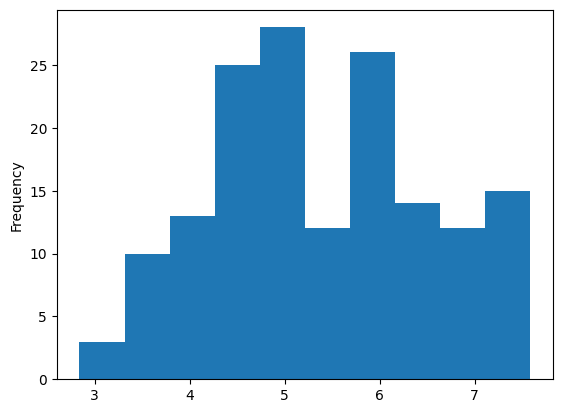

In [87]:
dataset['Happiness Score'].plot.hist()

In [67]:
Highrange = int(np.ceil(max(dataset['Happiness Score'])))
Lowrange = int(np.floor(min(dataset['Happiness Score'])))
range = Highrange -Lowrange
bins = 3
binwidth = int(np.round(range/bins))

In [68]:
print(binwidth)

2


In [69]:
dataset['Happiness_Scores']=pd.cut(dataset['Happiness Score'],bins = 3, labels = None, include_lowest=True)

In [70]:
dataset['Happiness_Scores']

0      (6.004, 7.587]
1      (6.004, 7.587]
2      (6.004, 7.587]
3      (6.004, 7.587]
4      (6.004, 7.587]
            ...      
153    (2.833, 4.422]
154    (2.833, 4.422]
155    (2.833, 4.422]
156    (2.833, 4.422]
157    (2.833, 4.422]
Name: Happiness_Scores, Length: 158, dtype: category
Categories (3, interval[float64, right]): [(2.833, 4.422] < (4.422, 6.004] < (6.004, 7.587]]

<Axes: xlabel='Happiness_Scores'>

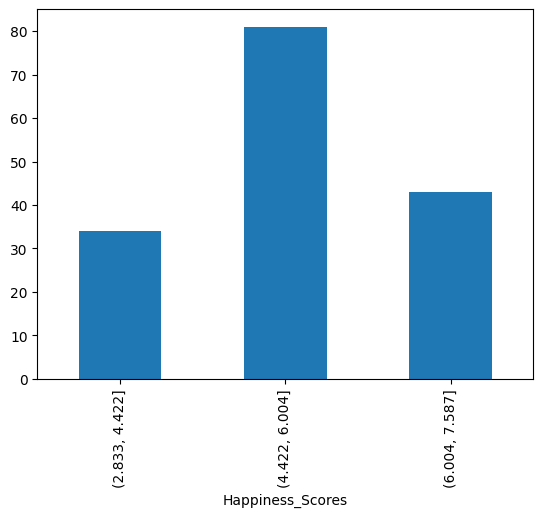

In [71]:
dataset.groupby('Happiness_Scores')['Happiness Score'].count().plot.bar()


One-Hot Encoding

In [76]:
dataset = pd.get_dummies(dataset, columns=["Region"])
dataset

,Country,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,...,Region_Australia and New Zealand,Region_Central and Eastern Europe,Region_Eastern Asia,Region_Latin America and Caribbean,Region_Middle East and Northern Africa,Region_North America,Region_Southeastern Asia,Region_Southern Asia,Region_Sub-Saharan Africa,Region_Western Europe
0,Switzerland,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,...,0,0,0,0,0,0,0,0,0,1
1,Iceland,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,...,0,0,0,0,0,0,0,0,0,1
2,Denmark,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,...,0,0,0,0,0,0,0,0,0,1
3,Norway,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,...,0,0,0,0,0,0,0,0,0,1
4,Canada,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,...,0,0,0,0,0,0,0,0,1,0
154,Benin,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,...,0,0,0,0,0,0,0,0,1,0
155,Syria,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,...,0,0,0,0,1,0,0,0,0,0
156,Burundi,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,...,0,0,0,0,0,0,0,0,1,0


The one hot encoding is used to conver the data to numerical form and the column region is converted to numerical for mat by using the function get_dummies.

In [84]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataset['region_num'] = label_encoder.fit_transform(dataset['Region'])

In [85]:
dataset

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,region_num
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,9
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,9
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,9
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,9
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,8
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,8
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,4
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,8


Normalization

Chi square test

In [100]:
# contingency table
c_table=pd.crosstab(dataset['Region'], dataset['Happiness Rank'])
display(c_table)

Happiness Rank,1,2,3,4,5,6,7,8,9,10,...,149,150,151,152,153,154,155,156,157,158
Region,,,,,,,,,,,,,,,,,,,,,
Australia and New Zealand,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
Central and Eastern Europe,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Eastern Asia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Latin America and Caribbean,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Middle East and Northern Africa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
North America,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Southeastern Asia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Southern Asia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Sub-Saharan Africa,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,0,1,1,0,1,1


In [94]:
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(c_table)

print("Chi-square value:", chi2)

Chi-square value: 1415.3258620689655


Covariance matrix

In [96]:
cov_mat = np.cov(dataset['Economy (GDP per Capita)'], dataset['Family'])
print(cov_mat)
# Economy (GDP per Capita),Family,Health (Life Expectancy).

[[0.16250636 0.07085235]
 [0.07085235 0.07418492]]


<ipython-input-108-7dee039a9dcd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr())


[]

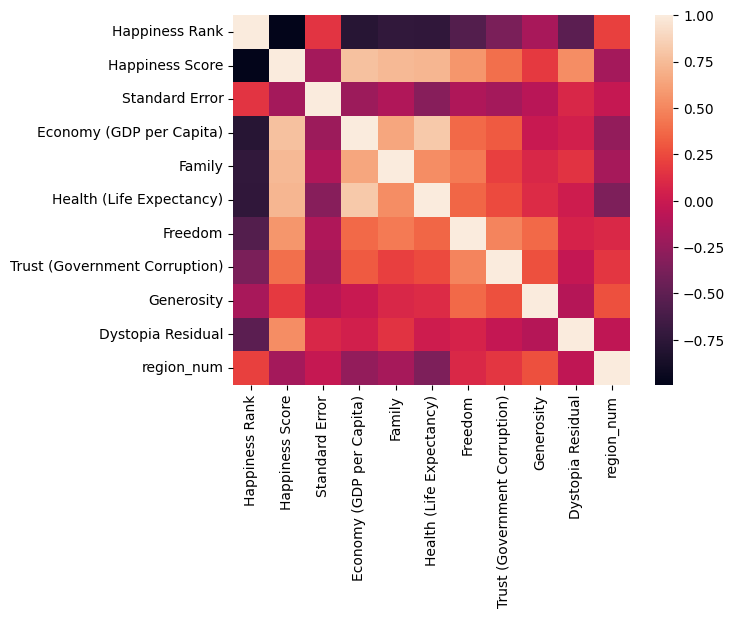

In [108]:
sns.heatmap(dataset.corr())
plt.plot()

Visualization

In [112]:
dataset['Health (Life Expectancy) '].plot.hist()

KeyError: ignored

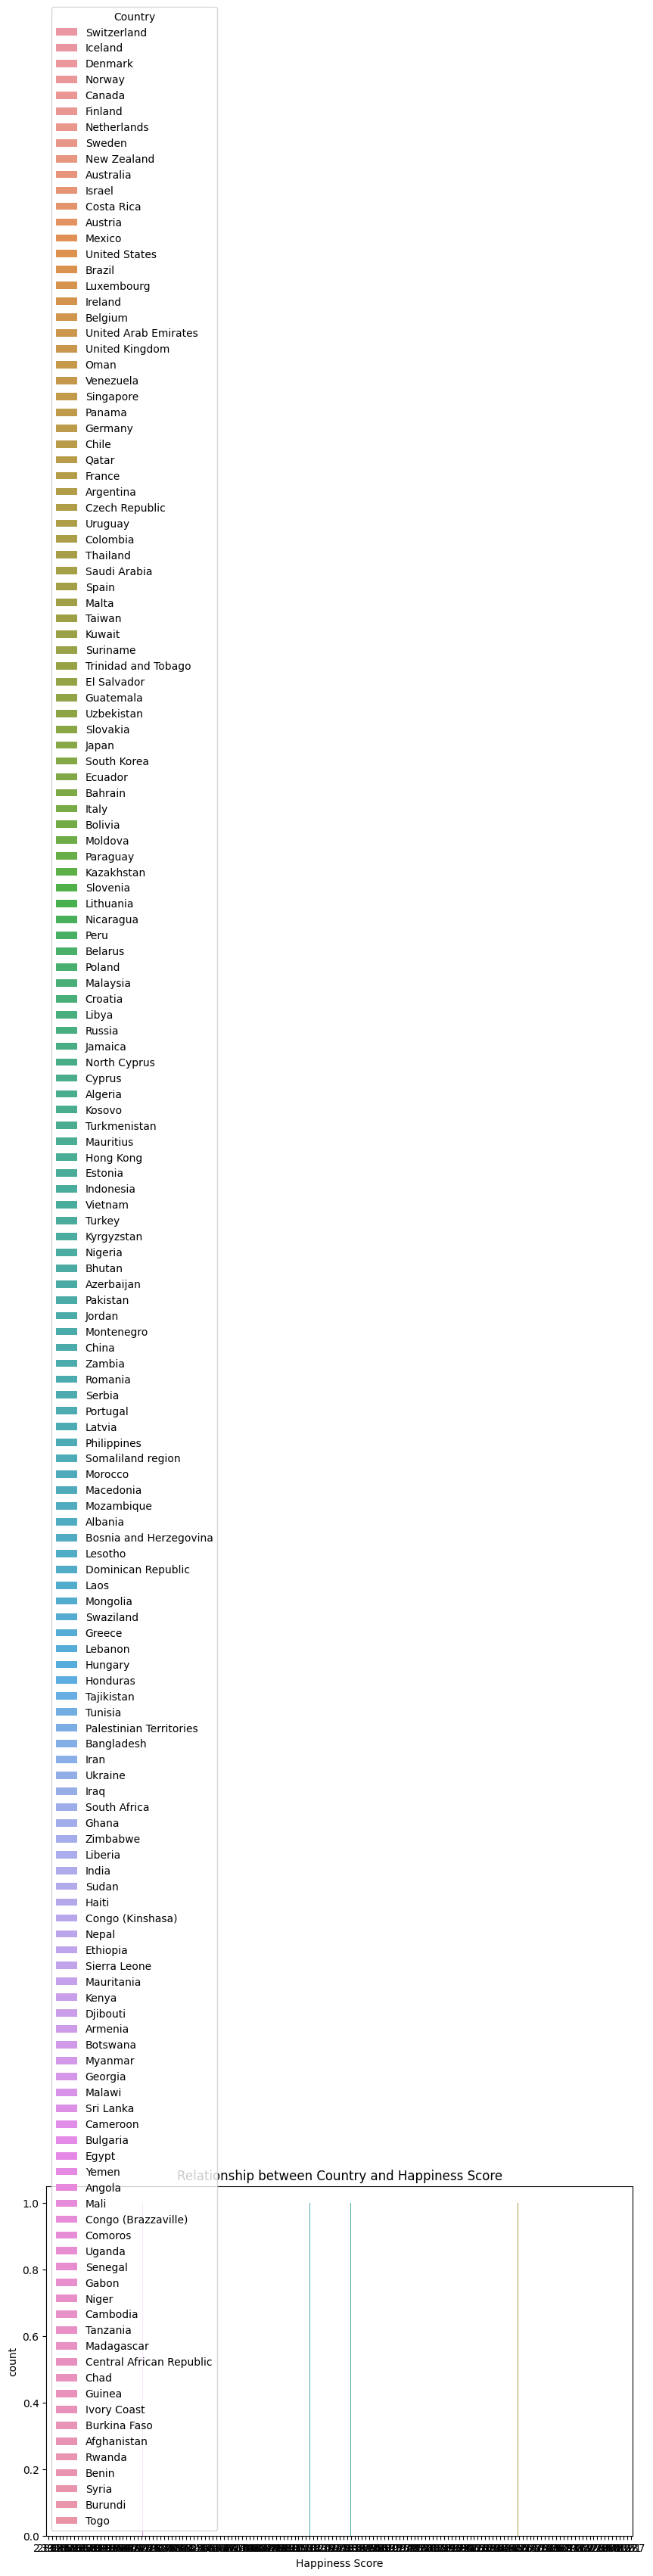

In [106]:
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset, x='Happiness Score', hue='Country')
plt.title("Relationship between Country and Happiness Score")
plt.show()